# Tutorial

In [1]:
from latticeadaptor.core import LatticeAdaptor

## Properties

In [2]:
la = LatticeAdaptor()
la.__dict__

{'history': <queue.LifoQueue at 0x7fcd97c2e9a0>,
 'name': None,
 'len': 0.0,
 '_table': None,
 'filename': None,
 'inputstr': None,
 'builder': <latticeconstructor.core.LatticeBuilderLine at 0x7fcd97c2e220>}

## Methods

In [3]:
from types import FunctionType
[x for x, y in LatticeAdaptor.__dict__.items() if (type(y) == FunctionType) and not x.startswith('_')]

['load_from_file',
 'load_from_string',
 'parse_table_to_madx_sequence_string',
 'parse_table_to_madx_sequence_file',
 'parse_table_to_elegant_string',
 'parse_table_to_elegant_file',
 'parse_table_to_tracy_string',
 'parse_table_to_tracy_file',
 'madx_sequence_add_start_end_marker_string',
 'parse_table_to_madx_install_str',
 'parse_table_to_madx_remove_str',
 'madx_sequence_save_string',
 'add_drifts',
 'parse_table_to_madx_line_string',
 'parse_table_to_madx_line_file',
 'get_quad_strengths',
 'get_sext_strengths',
 'load_strengths_to_table',
 'compare_seq_center_positions',
 'update_table',
 'undo']

## Load lattice from string

Lattices can be loaded from string or from file. Currently two lattice formats are implemented:
- lte
- madx (both sequence and line def)

In [4]:
 latticestring = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 1.00 , K1 := -1.00;
D1 : DRIFT, L := 1.00;
D2 : DRIFT, L := 1.00;

FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
D1, at = 1.00;
QD, at = 2.00;
D2, at = 3.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la1 = LatticeAdaptor()
la1.load_from_string(latticestring, ftype='madx')

Length has been autoset - check if value is ok - otherwise update it.


In [5]:
la1.name, la1.len

('FODO', 4.0)

In [6]:
la1.table

,family,L,K1,name,at
0,QUADRUPOLE,0.5,1.0,QF,0.25
1,DRIFT,1.0,NaN,D1,1.00
2,QUADRUPOLE,1.0,-1.0,QD,2.00
3,DRIFT,1.0,NaN,D2,3.00
4,QUADRUPOLE,0.5,1.0,QF,3.75


## Load lattice from file

In [7]:
# first write it to file
la1.parse_table_to_madx_sequence_file('lattice.seq')

# check if written ok
with open('lattice.seq','r') as f:
    dat = f.read()
    
print(dat)

QF              : QUADRUPOLE  , L:=0.5, K1:=1.0;
D1              : DRIFT       , L:=1.0;
QD              : QUADRUPOLE  , L:=1.0, K1:=-1.0;
D2              : DRIFT       , L:=1.0;
FODO: SEQUENCE, L=4.0;
QF         , at =     0.250000;
D1         , at =     1.000000;
QD         , at =     2.000000;
D2         , at =     3.000000;
QF         , at =     3.750000;
ENDSEQUENCE;


In [8]:
la3 = LatticeAdaptor()
la3.load_from_file('lattice.seq',ftype='madx')
la3.table

Length has been autoset - check if value is ok - otherwise update it.


,family,L,K1,name,at
0,QUADRUPOLE,0.5,1.0,QF,0.25
1,DRIFT,1.0,NaN,D1,1.00
2,QUADRUPOLE,1.0,-1.0,QD,2.00
3,DRIFT,1.0,NaN,D2,3.00
4,QUADRUPOLE,0.5,1.0,QF,3.75


## Create lattice manually

Lattice can also be created manually by defining:
- lattice name
- lattice length
- lattice table as data frame

In [9]:
import pandas as pd

# create manually
latticename = 'FODO'
latticelen  = 4.00
latticetable = pd.DataFrame([
    {'name': 'QF','pos': 0.25,'family': 'QUADRUPOLE','L': 0.5,'K1': 1.0,'ANGLE': 0.0,'at': 0.25},
    {'name': 'D1','pos': 1.0,'family': 'DRIFT','L': 1.0,'at': 1.0},
    {'name': 'QD','pos': 2.0,'family': 'QUADRUPOLE','L': 1.0,'K1': -1.0,'at': 2.0},
    {'name': 'D2','pos': 3.0,'family': 'DRIFT','L': 1.0,'at': 3.0},
    {'name': 'QF','pos': 3.75,'family': 'QUADRUPOLE','L': 0.5,'K1': 1.0,'ANGLE': 0.0,'at': 3.75}
    ])

# uplaod it to the latticeadaptor object
la2 = LatticeAdaptor()
la2.name  = latticename
la2.len   = latticelen
la2.table = latticetable

la2.table

,name,pos,family,L,K1,ANGLE,at
0,QF,0.25,QUADRUPOLE,0.5,1.0,0.0,0.25
1,D1,1.00,DRIFT,1.0,NaN,NaN,1.00
2,QD,2.00,QUADRUPOLE,1.0,-1.0,NaN,2.00
3,D2,3.00,DRIFT,1.0,NaN,NaN,3.00
4,QF,3.75,QUADRUPOLE,0.5,1.0,0.0,3.75


## Convert table to lattice format

### MADX Sequence

In [10]:
print(la1.parse_table_to_madx_sequence_string())

QF              : QUADRUPOLE  , L:=0.5, K1:=1.0;
D1              : DRIFT       , L:=1.0;
QD              : QUADRUPOLE  , L:=1.0, K1:=-1.0;
D2              : DRIFT       , L:=1.0;
FODO: SEQUENCE, L=4.0;
QF         , at =     0.250000;
D1         , at =     1.000000;
QD         , at =     2.000000;
D2         , at =     3.000000;
QF         , at =     3.750000;
ENDSEQUENCE;


In [11]:
print(la2.parse_table_to_madx_sequence_string())

QF              : QUADRUPOLE  , L:=0.5, K1:=1.0, ;
D1              : DRIFT       , L:=1.0;
QD              : QUADRUPOLE  , L:=1.0, K1:=-1.0;
D2              : DRIFT       , L:=1.0;
FODO: SEQUENCE, L=4.0;
QF         , at =     0.250000;
D1         , at =     1.000000;
QD         , at =     2.000000;
D2         , at =     3.000000;
QF         , at =     3.750000;
ENDSEQUENCE;


In [12]:
#save to file
la1.parse_table_to_madx_sequence_file('lattice.seq')

### MADX Line

In [13]:
print(la1.parse_table_to_madx_sequence_string())

QF              : QUADRUPOLE  , L:=0.5, K1:=1.0;
D1              : DRIFT       , L:=1.0;
QD              : QUADRUPOLE  , L:=1.0, K1:=-1.0;
D2              : DRIFT       , L:=1.0;
FODO: SEQUENCE, L=4.0;
QF         , at =     0.250000;
D1         , at =     1.000000;
QD         , at =     2.000000;
D2         , at =     3.000000;
QF         , at =     3.750000;
ENDSEQUENCE;


In [14]:
la1.parse_table_to_madx_line_file('lattice.madx')
with open('lattice.madx','r') as f:
    dat = f.read()
print(dat)

QF              : QUADRUPOLE  , L:=0.5, K1:=1.0;
D1              : DRIFT       , L:=1.0;
QD              : QUADRUPOLE  , L:=1.0, K1:=-1.0;
D2              : DRIFT       , L:=1.0;


FODO: LINE=(QF,D1,QD,D2,QF);


In [15]:
 latticestring = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 1.00 , K1 := -1.00;
D1 : DRIFT, L := 1.00;
D2 : DRIFT, L := 1.00;

FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
QD, at = 2.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la4 = LatticeAdaptor()
la4.load_from_string(latticestring, ftype='madx')
la4.table

Length has been autoset - check if value is ok - otherwise update it.


,family,L,K1,name,at
0,QUADRUPOLE,0.5,1.0,QF,0.25
1,QUADRUPOLE,1.0,-1.0,QD,2.00
2,QUADRUPOLE,0.5,1.0,QF,3.75


In [16]:
la4.parse_table_to_madx_line_file('lattice.madx')
with open('lattice.madx','r') as f:
    dat = f.read()
print(dat)

QF              : QUADRUPOLE  , L:=0.5, K1:=1.0;
D1              : DRIFT       , L:=1.0;
QD              : QUADRUPOLE  , L:=1.0, K1:=-1.0;
D2              : DRIFT       , L:=1.0;


FODO: LINE=(QF,D1,QD,D2,QF);


In [17]:
# generate madx inputstring to save sequence file
la1.madx_sequence_save_string('test.seq')

"SAVE, SEQUENCE=FODO, file='test.seq';"

### Elegant

In [18]:
latticestring = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 1.00 , K1 := -1.00;


FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
QD, at = 2.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la = LatticeAdaptor()
la.load_from_string(latticestring,ftype='madx')

Length has been autoset - check if value is ok - otherwise update it.


In [19]:
la.table

,family,L,K1,name,at
0,QUADRUPOLE,0.5,1.0,QF,0.25
1,QUADRUPOLE,1.0,-1.0,QD,2.00
2,QUADRUPOLE,0.5,1.0,QF,3.75


In [20]:
print(la.parse_table_to_elegant_string())

QF              : KQUAD       , L=  0.500000000000, K1=  1.000000000000
D1              : DRIF        , L=  1.000000000000
QD              : KQUAD       , L=  1.000000000000, K1= -1.000000000000
D2              : DRIF        , L=  1.000000000000


FODO: LINE=(QF, D1, QD, D2, QF)


In [21]:
la.parse_table_to_elegant_file('lattice.lte')
with open('lattice.lte','r') as f:
    dat = f.read()
print(dat)

QF              : KQUAD       , L=  0.500000000000, K1=  1.000000000000
D1              : DRIF        , L=  1.000000000000
QD              : KQUAD       , L=  1.000000000000, K1= -1.000000000000
D2              : DRIF        , L=  1.000000000000


FODO: LINE=(QF, D1, QD, D2, QF)


### Tracy

In [22]:
print(la1.parse_table_to_tracy_string())

QF: Quadrupole, L = 0.500000, K = 1.000000, N = Nquad, Method = 4;
D1: Drift, L = 1.0;
QD: Quadrupole, L = 1.000000, K = -1.000000, N = Nquad, Method = 4;
D2: Drift, L = 1.0;


FODO: QF, D1, QD, D2, QF;

ring: FODO;

cell: ring, symmetry = 1;

end;


In [23]:
la1.parse_table_to_tracy_file('lattice.lat')
with open('lattice.lat','r') as f:
    dat = f.read()
    
print(dat)

QF: Quadrupole, L = 0.500000, K = 1.000000, N = Nquad, Method = 4;
D1: Drift, L = 1.0;
QD: Quadrupole, L = 1.000000, K = -1.000000, N = Nquad, Method = 4;
D2: Drift, L = 1.0;


FODO: QF, D1, QD, D2, QF;

ring: FODO;

cell: ring, symmetry = 1;

end;


## Lattice operations

### Install string for markers at start and end of lattice

In [24]:
la1.table

,family,L,K1,name,at,pos
0,QUADRUPOLE,0.5,1.0,QF,0.25,0.25
1,DRIFT,1.0,NaN,D1,1.0,1.0
2,QUADRUPOLE,1.0,-1.0,QD,2.0,2.0
3,DRIFT,1.0,NaN,D2,3.0,3.0
4,QUADRUPOLE,0.5,1.0,QF,3.75,3.75


In [25]:
print(la1.madx_sequence_add_start_end_marker_string())

MSTART      : MARKER      ;
MEND        : MARKER      ;

USE, SEQUENCE=FODO;
SEQEDIT, SEQUENCE = FODO;  
FLATTEN;
INSTALL, ELEMENT = MSTART          , AT =     0.000000;
INSTALL, ELEMENT = MEND            , AT =     4.000000;
FLATTEN;
ENDEDIT;


### Add drifts back to sequence

In [26]:
 latticestring = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 1.00 , K1 := -1.00;
D1 : DRIFT, L := 1.00;
D2 : DRIFT, L := 1.00;

FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
QD, at = 2.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la4 = LatticeAdaptor()
la4.load_from_string(latticestring, ftype='madx')
la4.table

Length has been autoset - check if value is ok - otherwise update it.


,family,L,K1,name,at
0,QUADRUPOLE,0.5,1.0,QF,0.25
1,QUADRUPOLE,1.0,-1.0,QD,2.00
2,QUADRUPOLE,0.5,1.0,QF,3.75


In [27]:
la4.add_drifts()
la4.table

,family,L,K1,name,at,pos
0,QUADRUPOLE,0.5,1.0,QF,0.25,0.25
1,DRIFT,1.0,NaN,D1,NaN,1.0
2,QUADRUPOLE,1.0,-1.0,QD,2.0,2.0
3,DRIFT,1.0,NaN,D2,NaN,3.0
4,QUADRUPOLE,0.5,1.0,QF,3.75,3.75


### Extract settings

In [28]:
la1.get_quad_strengths()

{'QF': 1.0, 'QD': -1.0}

In [29]:
la1.get_sext_strengths()

{}

### Load settings

In [30]:
from latticeadaptor.utils import highlight_cells

In [31]:
settings_dict = {'QF' : 1.53}
la1.load_strengths_to_table(settings_dict,'K1')
la1.table.style.apply(
    highlight_cells,_list=list(settings_dict.values()),color="lightgreen",axis=1
)

,family,L,K1,name,at,pos
0,QUADRUPOLE,0.500000,1.530000,QF,0.250000,0.250000
1,DRIFT,1.000000,nan,D1,1.000000,1.000000
2,QUADRUPOLE,1.000000,-1.000000,QD,2.000000,2.000000
3,DRIFT,1.000000,nan,D2,3.000000,3.000000
4,QUADRUPOLE,0.500000,1.530000,QF,3.750000,3.750000


### Update table from builder

In [32]:
la1.name, la1.len, la1.builder.lattice

('FODO', 4.0, ['QF', 'D1', 'QD', 'D2', 'QF'])

In [33]:
la1.builder.lattice.append("D1")
la1.builder.lattice

['QF', 'D1', 'QD', 'D2', 'QF', 'D1']

In [34]:
la1.table

,family,L,K1,name,at,pos
0,QUADRUPOLE,0.5,1.53,QF,0.25,0.25
1,DRIFT,1.0,NaN,D1,1.0,1.0
2,QUADRUPOLE,1.0,-1.0,QD,2.0,2.0
3,DRIFT,1.0,NaN,D2,3.0,3.0
4,QUADRUPOLE,0.5,1.53,QF,3.75,3.75


In [35]:
la1.builder.positions

,name,at
0,QF,0.25
1,D1,1.00
2,QD,2.00
3,D2,3.00
4,QF,3.75


In [36]:
la1.update_table()

Length has been autoset - check if value is ok - otherwise update it.


In [37]:
la1.builder.definitions

{'QF': {'family': 'QUADRUPOLE', 'L': 0.5, 'K1': 1.0},
 'QD': {'family': 'QUADRUPOLE', 'L': 1.0, 'K1': -1.0},
 'D1': {'family': 'DRIFT', 'L': 1.0},
 'D2': {'family': 'DRIFT', 'L': 1.0}}

In [38]:
la1.name, la1.len, la1.builder.lattice

('FODO', 5.0, ['QF', 'D1', 'QD', 'D2', 'QF', 'D1'])

In [39]:
la1.builder.positions

In [40]:
la1.builder.table

,family,L,K1,name,at
0,QUADRUPOLE,0.5,1.0,QF,0.25
1,DRIFT,1.0,NaN,D1,1.00
2,QUADRUPOLE,1.0,-1.0,QD,2.00
3,DRIFT,1.0,NaN,D2,3.00
4,QUADRUPOLE,0.5,1.0,QF,3.75
5,DRIFT,1.0,NaN,D1,4.50


### Compare settings

In [41]:
from latticeadaptor.utils import compare_settings_dicts
from latticeadaptor.utils import Beamlinegraph_compare_from_seq_files

In [42]:
la2.compare_seq_center_positions('lattice.seq')

(  name_x   pos name_y
 0     QF  0.25     QF
 1     D1  1.00     D1
 2     QD  2.00     QD
 3     D2  3.00     D2
 4     QF  3.75     QF,
 Empty DataFrame
 Columns: [name, pos]
 Index: [])

In [43]:
quad_set1 = la1.get_quad_strengths()
quad_set2 = la2.get_quad_strengths()
compare_settings_dicts(quad_set1, quad_set2, threshold=1)

QF           1.000000000000   1.000000000000
QD          -1.000000000000  -1.000000000000


In [44]:
quad_set1 = la1.get_quad_strengths()
quad_set2 = la2.get_quad_strengths()
compare_settings_dicts(quad_set1, quad_set2, threshold=.1)

QF           1.000000000000   1.000000000000
QD          -1.000000000000  -1.000000000000


In [45]:
latticestring = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 0.75 , K1 := -1.00;

FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
QD, at = 2.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la4 = LatticeAdaptor()
la4.load_from_string(latticestring, ftype='madx')
la4.parse_table_to_madx_sequence_file('lattice2.seq')

Length has been autoset - check if value is ok - otherwise update it.


(<module 'matplotlib.pyplot' from '/home/mti/anaconda3/envs/lae/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <AxesSubplot:xlabel='S[m]'>)

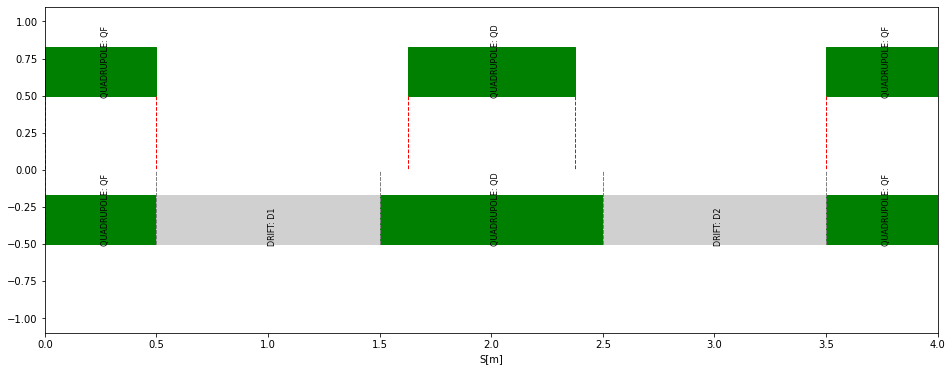

In [46]:
Beamlinegraph_compare_from_seq_files('lattice.seq','lattice2.seq')

## Plotting

In [47]:
from latticeadaptor.utils import Beamlinegraph_from_seq_file

Length has been autoset - check if value is ok - otherwise update it.


(<module 'matplotlib.pyplot' from '/home/mti/anaconda3/envs/lae/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <AxesSubplot:xlabel='S[m]'>)

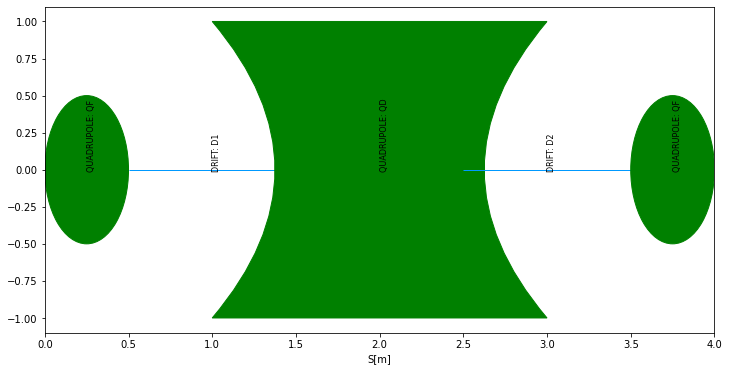

In [48]:
madxseqsymm = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 1.00 , K1 := -1.00;
D1 : DRIFT, L := 1.00;
D2 : DRIFT, L := 1.00;

FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
D1, at = 1.00;
QD, at = 2.00;
D2, at = 3.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la = LatticeAdaptor()
la.load_from_string(madxseqsymm,ftype='madx')
la.parse_table_to_madx_sequence_file('fodo.seq')
Beamlinegraph_from_seq_file('fodo.seq')

Length has been autoset - check if value is ok - otherwise update it.


(<module 'matplotlib.pyplot' from '/home/mti/anaconda3/envs/lae/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <AxesSubplot:xlabel='S[m]'>)

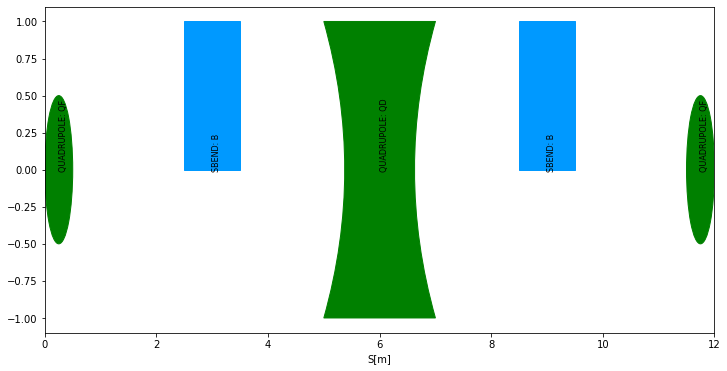

In [49]:
madxseqsymm = """
QF: QUADRUPOLE, L=0.5,K1=0.2; 
QD: QUADRUPOLE, L=1.0,K1=-0.2; 
B: SBEND, L=1.0, ANGLE=15.0, E1 =7.5, E2=7.5; 
FODO: SEQUENCE, L=12.0;
QF, at = 0.25;
B,  at = 3.00;
QD, at = 6.00;
B,  at = 9.00;
QF, at = 11.75;
ENDSEQUENCE;
"""
la = LatticeAdaptor()
la.load_from_string(madxseqsymm,ftype='madx')
la.parse_table_to_madx_sequence_file('fodob.seq')
Beamlinegraph_from_seq_file('fodob.seq')

(<module 'matplotlib.pyplot' from '/home/mti/anaconda3/envs/lae/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <AxesSubplot:xlabel='S[m]'>)

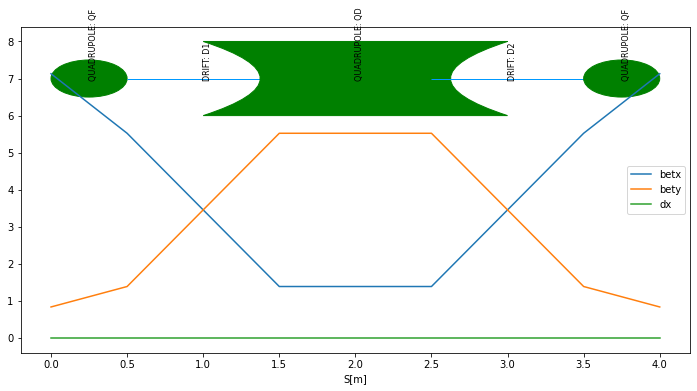

In [50]:
from latticeadaptor.utils import twissplot
import numpy as np

from cpymad.madx import Madx
madx = Madx(stdout=False)
madx.command.beam(particle='electron',energy=1.7)
madx.call(file='fodo.seq')
madx.use(sequence='FODO')
twiss = madx.twiss()
twissplot(
    twiss, cols=["betx", "bety", "dx"], 
    beamlinegraph=True, 
    sequence='fodo.seq',
    offset_array = np.array([0.0,7.0]), 
    anno=True
)

## Advanced editing

In [51]:
from latticeadaptor.utils import dipole_split_angles_to_dict

dipolename = 'B'
dipolelen  = 6.00
dipoleanglerad = 0.098 
anglelistdeg = [1.4,2.5,6.4]
split_dict = dipole_split_angles_to_dict(dipolename,dipolelen,dipoleanglerad,anglelistdeg,verbose=True)

Dipole length [m]       :     6.000000
Dipole Bend Angle [rad] :     0.098000
Dipole Bend Angle [deg] :     5.614986
Dipole Bend Radius [m]  :    61.224490


BM splitting angles               [deg] :     1.400000    2.500000    2.807493    5.614986    6.400000
BM splitting angles  - cumulative [rad] :     0.024435    0.043633    0.049000    0.098000    0.111701
BM splitting angles  - individual [rad] :     0.024435    0.019199    0.005367    0.049000    0.013701
BM splitting lengths - cumulative [m]   :     1.495997    2.671422    3.000000    6.000000    6.838841
BM splitting lengths - individual [m]   :     1.495997    1.175426    0.328578    3.000000    0.838841



In [52]:
split_dict

{'B': {'lengths': array([1.4959965 , 1.17542582, 0.32857768, 3.        , 0.83884115]),
  'angles': array([0.02443461, 0.01919862, 0.00536677, 0.049     , 0.01370107])}}

In [53]:
from latticeadaptor.utils import split_dipoles, filter_family

dfdip  = filter_family(la.table, 'SBEND')
newdip = split_dipoles(dfdip, split_dict ,dipoleanglerad/2)
newdip

,L,at,family,name,pos,ANGLE,E1,E2,K1
0,0.000000,3.995997,MARKER,MBEAMPORT_2A1,3.995997,NaN,NaN,NaN,NaN
1,1.495997,3.247998,SBEND,B1_1p40_deg,NaN,0.024435,7.5,0.0,NaN
2,0.000000,5.171422,MARKER,MBEAMPORT_2A2,5.171422,NaN,NaN,NaN,NaN
3,1.175426,4.583709,SBEND,B1_2p50_deg,NaN,0.019199,0.0,0.0,NaN
4,0.000000,5.500000,MARKER,MB_MIDDLE,5.500000,NaN,NaN,NaN,NaN
5,0.328578,5.335711,SBEND,B1_2p81_deg,NaN,0.005367,0.0,0.0,NaN
6,3.000000,7.000000,SBEND,B2_5p61_deg,NaN,0.049000,0.0,0.0,NaN
7,0.000000,9.338841,MARKER,MBEAMPORT_2B2,9.338841,NaN,NaN,NaN,NaN
8,0.838841,8.919421,SBEND,B2_6p40_deg,NaN,0.013701,0.0,7.5,NaN
9,0.000000,9.995997,MARKER,MBEAMPORT_2A1,9.995997,NaN,NaN,NaN,NaN


In [54]:
latticestring = """
QF : QUADRUPOLE, L := 0.50 , K1 :=  1.00;
QD : QUADRUPOLE, L := 0.75 , K1 := -1.00;

FODO: SEQUENCE, L=4.00;
QF, at = 0.25;
QD, at = 2.00;
QF, at = 3.75;
ENDSEQUENCE;
"""
la = LatticeAdaptor()
la.load_from_string(latticestring, ftype='madx')
la.add_drifts()
la.table

Length has been autoset - check if value is ok - otherwise update it.


,family,L,K1,name,at,pos
0,QUADRUPOLE,0.5,1.0,QF,0.25,0.25
1,DRIFT,1.125,NaN,D1,NaN,1.0625
2,QUADRUPOLE,0.75,-1.0,QD,2.0,2.0
3,DRIFT,1.125,NaN,D2,NaN,2.9375
4,QUADRUPOLE,0.5,1.0,QF,3.75,3.75


In [55]:
la.undo()
la.table

,family,L,K1,name,at
0,QUADRUPOLE,0.50,1.0,QF,0.25
1,QUADRUPOLE,0.75,-1.0,QD,2.00
2,QUADRUPOLE,0.50,1.0,QF,3.75


In [56]:
print(la.parse_table_to_madx_install_str())

USE, SEQUENCE=FODO;
SEQEDIT, SEQUENCE = FODO;  
FLATTEN;
INSTALL, ELEMENT = QF              , AT =     0.250000;
INSTALL, ELEMENT = QD              , AT =     2.000000;
INSTALL, ELEMENT = QF              , AT =     3.750000;
FLATTEN;
ENDEDIT;


In [57]:
print(la.parse_table_to_madx_remove_str())

USE, SEQUENCE=FODO;
SEQEDIT, SEQUENCE = FODO;  
FLATTEN;
REMOVE, ELEMENT = QF              ;
REMOVE, ELEMENT = QD              ;
REMOVE, ELEMENT = QF              ;
FLATTEN;
ENDEDIT;


## Advanced diplole splitting example

In [58]:
# load more complicated lattice
lad = LatticeAdaptor()
lad.load_from_file("bessy_base.seq",ftype='madx')

# filter the dipoles out
dfdip = filter_family(lad.table,"SBEND")
dfdip.head()

Length has been autoset - check if value is ok - otherwise update it.


,family,name,L,K2,K1,ANGLE,E1,E2,at
0,SBEND,BM2D1R,0.855,NaN,NaN,0.19635,0.098175,0.098175,5.1825
1,SBEND,BM1T1R,0.855,NaN,NaN,0.19635,0.098175,0.098175,9.8175
2,SBEND,BM2T1R,0.855,NaN,NaN,0.19635,0.098175,0.098175,20.1825
3,SBEND,BM1D2R,0.855,NaN,NaN,0.19635,0.098175,0.098175,24.8175
4,SBEND,BM2D2R,0.855,NaN,NaN,0.19635,0.098175,0.098175,35.1825


In [59]:
# dipole values
dipole_length         = 0.855
dipole_bend_angle_rad = np.pi / 16
dipole_bend_angle_deg = np.rad2deg(dipole_bend_angle_rad)
dipole_bend_radius    = dipole_length / dipole_bend_angle_rad

# general splitting
split_angles_BM2_deg  = [4.0, 6.7, dipole_bend_angle_deg -2.0]
split_angles_BM1_deg  = [2.0, dipole_bend_angle_deg - 6.7, dipole_bend_angle_deg - 4.0]

# special splitting - minus signs due to BM2 magnets 
split_angles_special = {
    "BM2D2R" : sorted(
    [
        3.7,
        4.0,
        4.1,
        4.3,
        6.7,
        dipole_bend_angle_deg - 2.0, 
    ]  
),
    "BM2D5R" : sorted(
    [
        3.6580,
        4.0,
        4.129,
        4.299,
        6.7,
        dipole_bend_angle_deg - 2.0,
    ] 
)
}
        
# add all the splitings to a single dict
splitting_dict  = {}

for i, row in dfdip.iterrows():
    if row["name"] not in list(split_angles_special.keys()):
        if "BM1" in row["name"]:
            angle_list = split_angles_BM1_deg
            
        elif "BM2" in row["name"]:
            angle_list = split_angles_BM2_deg
            
        else:
            print("NOK")
            break
        
    else:
        angle_list = split_angles_special[row["name"]]

        
    splitting_dict = {**splitting_dict,**dipole_split_angles_to_dict(row["name"], row.L, row.ANGLE, angle_list, verbose=True)}

Dipole length [m]       :     0.855000
Dipole Bend Angle [rad] :     0.196350
Dipole Bend Angle [deg] :    11.250000
Dipole Bend Radius [m]  :     4.354479


BM splitting angles               [deg] :     4.000000    5.625000    6.700000    9.250000   11.250000
BM splitting angles  - cumulative [rad] :     0.069813    0.098175    0.116937    0.161443    0.196350
BM splitting angles  - individual [rad] :     0.069813    0.028362    0.018762    0.044506    0.034907
BM splitting lengths - cumulative [m]   :     0.304000    0.427500    0.509200    0.703000    0.855000
BM splitting lengths - individual [m]   :     0.304000    0.123500    0.081700    0.193800    0.152000

Dipole length [m]       :     0.855000
Dipole Bend Angle [rad] :     0.196350
Dipole Bend Angle [deg] :    11.250000
Dipole Bend Radius [m]  :     4.354479


BM splitting angles               [deg] :     2.000000    4.550000    5.625000    7.250000   11.250000
BM splitting angles  - cumulative [rad] :     0.034907    0.07941

In [60]:
# check one of the entries
splitting_dict['BM2D1R']

{'lengths': array([0.304 , 0.1235, 0.0817, 0.1938, 0.152 ]),
 'angles': array([0.06981317, 0.0283616 , 0.01876229, 0.0445059 , 0.03490658])}

In [61]:
# create a table containing the beamport markers

# split the dipoles and add the markers (auto-named)
dfbeamports = split_dipoles(dfdip, splitting_dict, dipole_bend_angle_rad/2.0)

# update the pos
dfbeamports['pos'] = dfbeamports['at']
dfbeamports = dfbeamports.sort_values(by="pos").reset_index(drop=True)

In [62]:
dfbeamports.head(10)

,L,at,family,name,pos,ANGLE,E1,E2,K1,K2
0,0.3040,4.90700,SBEND,BM2D1R1_4p00_deg,4.90700,0.069813,0.098175,0.000000,NaN,NaN
1,0.0000,5.05900,MARKER,MBEAMPORT_2A1,5.05900,NaN,NaN,NaN,NaN,NaN
2,0.1235,5.12075,SBEND,BM2D1R1_5p62_deg,5.12075,0.028362,0.000000,0.000000,NaN,NaN
3,0.0000,5.18250,MARKER,MBM2D1R_MIDDLE,5.18250,NaN,NaN,NaN,NaN,NaN
4,0.0817,5.22335,SBEND,BM2D1R2_6p70_deg,5.22335,0.018762,0.000000,0.000000,NaN,NaN
5,0.0000,5.26420,MARKER,MBEAMPORT_2B1,5.26420,NaN,NaN,NaN,NaN,NaN
6,0.1938,5.36110,SBEND,BM2D1R2_9p25_deg,5.36110,0.044506,0.000000,0.000000,NaN,NaN
7,0.0000,5.45800,MARKER,MBEAMPORT_2B2,5.45800,NaN,NaN,NaN,NaN,NaN
8,0.1520,5.53400,SBEND,BM2D1R2_11p25_deg,5.53400,0.034907,0.000000,0.098175,NaN,NaN
9,0.1520,9.46600,SBEND,BM1T1R1_2p00_deg,9.46600,0.034907,0.098175,0.000000,NaN,NaN


In [63]:
# sort, add sectors
dfbeamportssec = dfbeamports.copy().sort_values(by="pos").reset_index(drop=True)
dfbeamportssec['sector'] = dfbeamportssec["name"].apply(lambda x: x[3:5] if (not "PORT" in x) and not "MIDDLE" in x else np.nan)
dfbeamportssec["sector"] = dfbeamportssec["sector"].fillna(method="ffill")

# check out the D2 sector
dfbeamportssec.loc[dfbeamportssec.sector=="D2"].sort_values(by="pos").head()

,L,at,family,name,pos,ANGLE,E1,E2,K1,K2,sector
27,0.1520,24.46600,SBEND,BM1D2R1_2p00_deg,24.46600,0.034907,0.098175,0.0,NaN,NaN,D2
28,0.0000,24.54200,MARKER,MBEAMPORT_1A1,24.54200,NaN,NaN,NaN,NaN,NaN,D2
29,0.1938,24.63890,SBEND,BM1D2R1_4p55_deg,24.63890,0.044506,0.000000,0.0,NaN,NaN,D2
30,0.0000,24.73580,MARKER,MBEAMPORT_1A2,24.73580,NaN,NaN,NaN,NaN,NaN,D2
31,0.0817,24.77665,SBEND,BM1D2R1_5p62_deg,24.77665,0.018762,0.000000,0.0,NaN,NaN,D2


In [64]:
# highlighting some beamports - visual checking
from latticeadaptor.utils import highlight_cells, highlight_row

dfbeamportssec.loc[dfbeamportssec.sector=="D2"][-15:].style.apply(
    highlight_row,_list=["MBEAMPORT_2A1","MBEAMPORT_2A3","MBEAMPORT_2A4"], column=["name"],axis=1
).apply(highlight_row,_list=["BM2D2R1_3p70_deg","BM2D2R1_4p10_deg","BM2D2R1_4p30_deg"], column=["name"],color="orange",axis=1)

,L,at,family,name,pos,ANGLE,E1,E2,K1,K2,sector
36,0.281200,34.895600,SBEND,BM2D2R1_3p70_deg,34.895600,0.064577,0.098175,0.000000,nan,nan,D2
37,0.000000,35.036200,MARKER,MBEAMPORT_2A1,35.036200,nan,nan,nan,nan,nan,D2
38,0.022800,35.047600,SBEND,BM2D2R1_4p00_deg,35.047600,0.005236,0.000000,0.000000,nan,nan,D2
39,0.000000,35.059000,MARKER,MBEAMPORT_2A2,35.059000,nan,nan,nan,nan,nan,D2
40,0.007600,35.062800,SBEND,BM2D2R1_4p10_deg,35.062800,0.001745,0.000000,0.000000,nan,nan,D2
41,0.000000,35.066600,MARKER,MBEAMPORT_2A3,35.066600,nan,nan,nan,nan,nan,D2
42,0.015200,35.074200,SBEND,BM2D2R1_4p30_deg,35.074200,0.003491,0.000000,0.000000,nan,nan,D2
43,0.000000,35.081800,MARKER,MBEAMPORT_2A4,35.081800,nan,nan,nan,nan,nan,D2
44,0.100700,35.132150,SBEND,BM2D2R1_5p62_deg,35.132150,0.023126,0.000000,0.000000,nan,nan,D2
45,0.000000,35.182500,MARKER,MBM2D2R_MIDDLE,35.182500,nan,nan,nan,nan,nan,D2


In [65]:
# rename some of the auto-named markers
dfbeamports.loc[37, "name"] = "M_PINHOLE3"
dfbeamports.loc[41, "name"] = "M_OLD_STREAK_CAMERA"
dfbeamports.loc[43, "name"] = "M_ADP_FILL_PATTERN"

# check if updated in original seq table
dfbeamports[36:50].style.apply(
    highlight_cells,
    _list=["M_PINHOLE3","M_OLD_STREAK_CAMERA","M_ADP_FILL_PATTERN"],
    color="lightgreen")

,L,at,family,name,pos,ANGLE,E1,E2,K1,K2
36,0.281200,34.895600,SBEND,BM2D2R1_3p70_deg,34.895600,0.064577,0.098175,0.000000,nan,nan
37,0.000000,35.036200,MARKER,M_PINHOLE3,35.036200,nan,nan,nan,nan,nan
38,0.022800,35.047600,SBEND,BM2D2R1_4p00_deg,35.047600,0.005236,0.000000,0.000000,nan,nan
39,0.000000,35.059000,MARKER,MBEAMPORT_2A2,35.059000,nan,nan,nan,nan,nan
40,0.007600,35.062800,SBEND,BM2D2R1_4p10_deg,35.062800,0.001745,0.000000,0.000000,nan,nan
41,0.000000,35.066600,MARKER,M_OLD_STREAK_CAMERA,35.066600,nan,nan,nan,nan,nan
42,0.015200,35.074200,SBEND,BM2D2R1_4p30_deg,35.074200,0.003491,0.000000,0.000000,nan,nan
43,0.000000,35.081800,MARKER,M_ADP_FILL_PATTERN,35.081800,nan,nan,nan,nan,nan
44,0.100700,35.132150,SBEND,BM2D2R1_5p62_deg,35.132150,0.023126,0.000000,0.000000,nan,nan
45,0.000000,35.182500,MARKER,MBM2D2R_MIDDLE,35.182500,nan,nan,nan,nan,nan
